## Importing libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import collections
import os
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [76]:
filenames = os.listdir('./Data')
filenames

['April_2019.csv',
 'August_2019.csv',
 'December_2019.csv',
 'February_2019.csv',
 'January_2019.csv',
 'July_2019.csv',
 'June_2019.csv',
 'March_2019.csv',
 'May_2019.csv',
 'November_2019.csv',
 'October_2019.csv',
 'September_2019.csv']

In [77]:
entire_dataset = pd.DataFrame()
for file in filenames:
  df = pd.read_csv('./Data/'+file)
  entire_dataset = pd.concat([entire_dataset , df])

In [78]:
data = entire_dataset
data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6957,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
12848,222178,27in 4K Gaming Monitor,1,389.99,06/10/19 22:06,"642 Washington St, Boston, MA 02215"
7910,230470,Wired Headphones,1,11.99,07/20/19 17:23,"233 5th St, Boston, MA 02215"
6923,229529,AAA Batteries (4-pack),1,2.99,07/09/19 08:37,"318 5th St, Los Angeles, CA 90001"
8921,185076,Google Phone,1,600,04/13/19 11:00,"922 10th St, San Francisco, CA 94016"
6395,182671,Wired Headphones,1,11.99,04/23/19 16:57,"459 North St, San Francisco, CA 94016"
11337,247515,USB-C Charging Cable,1,11.95,08/15/19 15:59,"876 Lake St, Dallas, TX 75001"
13543,206976,AA Batteries (4-pack),1,3.84,05/07/19 13:32,"674 12th St, Boston, MA 02215"
9640,159709,AA Batteries (4-pack),1,3.84,02/26/19 16:42,"787 Spruce St, Los Angeles, CA 90001"
8561,184735,Vareebadd Phone,1,400,04/13/19 11:45,"747 Pine St, Los Angeles, CA 90001"


In [79]:
data.shape

(186850, 6)

## Data Processing

In [80]:
# checking for missing values
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [81]:
data[data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# dropping rows with missing values
data.dropna(axis= 0, inplace = True)

In [83]:
# checking for missing values
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [84]:
# checking for duplicates
data.duplicated().sum()

618

In [91]:
# validating duplicates
duplicates = data[data.duplicated(subset=['Order ID'], keep=False)]
sorted_duplicates = duplicates.sort_values(by=['Order ID']).to_string(index=False)
display(HTML(f"<div style='max-height: 300px; overflow-y: auto; white-space: pre;'>{sorted_duplicates}</div>"))

In [92]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [93]:
print(data['Quantity Ordered'].unique())

['2' '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']


#### Converting the columns to appropriate data type 

##### Quantity Ordered contains string values such as Quantity Ordered

In [94]:
filter = data[data['Quantity Ordered'] != 'Quantity Ordered']

In [95]:
filter['Quantity Ordered'] = filter['Quantity Ordered'].astype(int)

##### Converting these string values to avg of the Quantity Ordered
Assumption - using the average price as a reasonable estimate for missing data

In [97]:
avg_quantity_ordered = round(filter['Quantity Ordered'].mean())

In [98]:
data['Quantity Ordered'] = data['Quantity Ordered'].replace('Quantity Ordered' ,avg_quantity_ordered )

In [99]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)

#### Converting Price column  

In [100]:
len(data[data['Price Each']=='Price Each'])

355

##### 355 rows have a string value in Price Column - replacing these with avg

In [101]:
filter2 = data[data['Price Each'] != 'Price Each']
filter2['Price Each'] = filter2['Price Each'].astype(float);
avg_price = round(filter2['Price Each'].mean())
data['Price Each'] = data['Price Each'].replace('Price Each' ,avg_price )
data['Price Each'] = data['Price Each'].astype(float)

#### Converting Order Data to datetime

In [102]:
data = data[data['Order Date'] != 'Order Date']

In [103]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M')

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


### Feature Engineering

In [105]:
data['Total'] = data['Quantity Ordered'] * data['Price Each']

In [106]:
data['day'] = data['Order Date'].dt.day_name()
data['month'] = data['Order Date'].dt.month_name()
data['hour'] = data['Order Date'].dt.hour

In [107]:
data[['Street Address', 'City', 'State ZIP']] = data['Purchase Address'].str.split(', ', expand=True)

In [108]:
data[['State' , 'Zip']] = data['State ZIP'].str.split(' ',expand = True)

In [109]:
data.drop(['Purchase Address' , 'State ZIP'] , axis = 1 ,inplace = True)

In [110]:
data = data.sort_values(by='Order Date' )
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total,day,month,hour,Street Address,City,State,Zip
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,11.99,Tuesday,January,3,9 Lake St,New York City,NY,10001
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,11.95,Tuesday,January,3,760 Church St,San Francisco,CA,94016
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,150.00,Tuesday,January,4,735 5th St,New York City,NY,10001
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,2.99,Tuesday,January,5,75 Jackson St,Dallas,TX,75001
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,23.90,Tuesday,January,6,943 2nd St,Atlanta,GA,30301


In [111]:
data['City'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

## Exploratory Data Analysis

#### Determing best month in terms of sales

In [112]:
monthly_sales  = data.groupby(['month'] , as_index = False)['Total'].sum()
monthly_sales

,month,Total
0,April,3390670.24
1,August,2244467.88
2,December,4613443.34
3,February,2202022.42
4,January,1822256.73
5,July,2647775.76
6,June,2577802.26
7,March,2807100.38
8,May,3152606.75
9,November,3199603.20


#### Sorting monthly_sales by Month

In [120]:
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
monthly_sales.sort_values('month' , key = lambda x : x.apply(lambda y : month_dict[y]) , inplace = True)

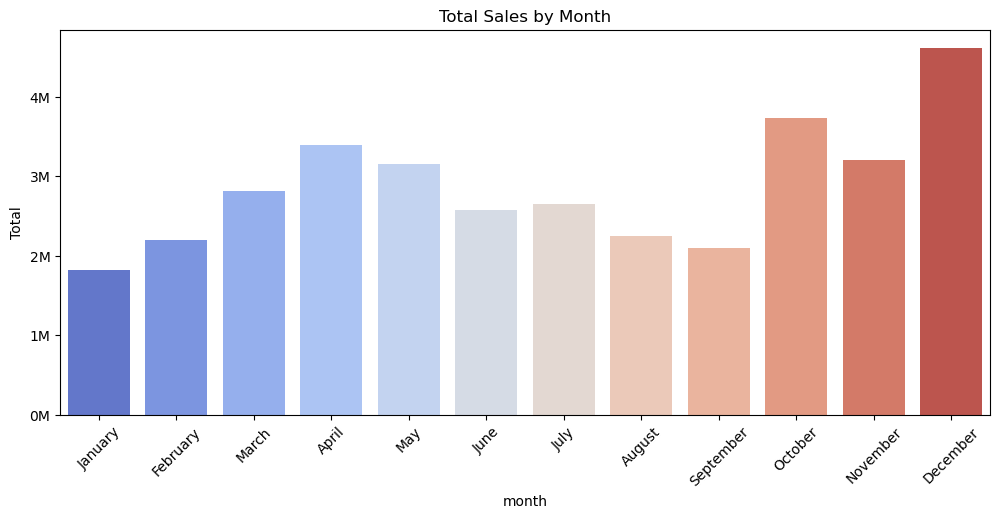

In [121]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=monthly_sales, x='month', y='Total', palette="coolwarm")  # Use a colormap
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M'))
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()

#### Identifying week with highest sales

In [122]:
day_data = data.groupby(['month' , 'day'],as_index = False).agg({'Total' : 'sum','Order ID':'count'})

In [123]:
day_dict = {
        'Saturday': 1, 'Sunday': 2, 'Monday': 3, 'Thursday': 4, 'Wednesday': 5, 'Tuesday': 6,
        'Friday': 7
}

day_data['month'] = pd.Categorical(day_data['month'], categories=month_dict, ordered=True)
day_data['day'] = pd.Categorical(day_data['day'], categories=day_dict, ordered=True)
day_data.sort_values(by=['month', 'day'], inplace=True)

In [124]:
day_data_order = day_data.pivot_table(index = 'month' , values = 'Order ID',columns='day' )

<Axes: xlabel='month', ylabel='Count of Orders'>

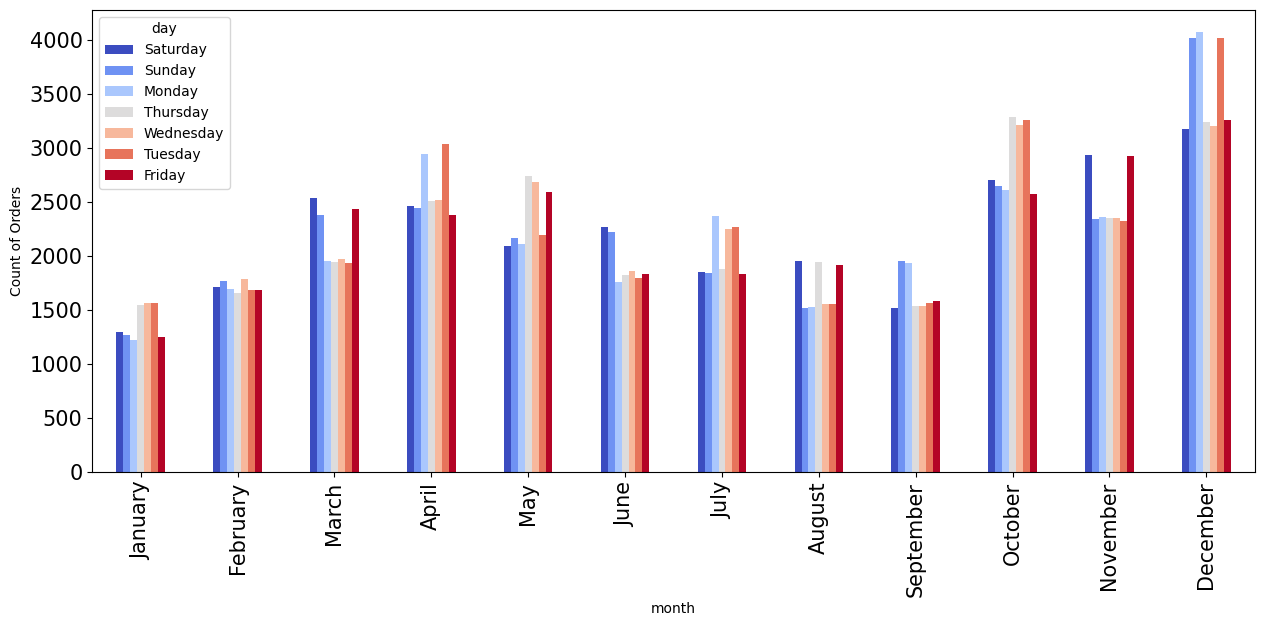

In [125]:
day_data_order.plot(kind='bar', figsize=(15, 6), fontsize=15, ylabel="Count of Orders", colormap='coolwarm')

#### Identifying revenue trend across days within a week for each month

In [127]:
day_data_Total = day_data.pivot_table(index = 'month' , values = 'Total',columns='day' )

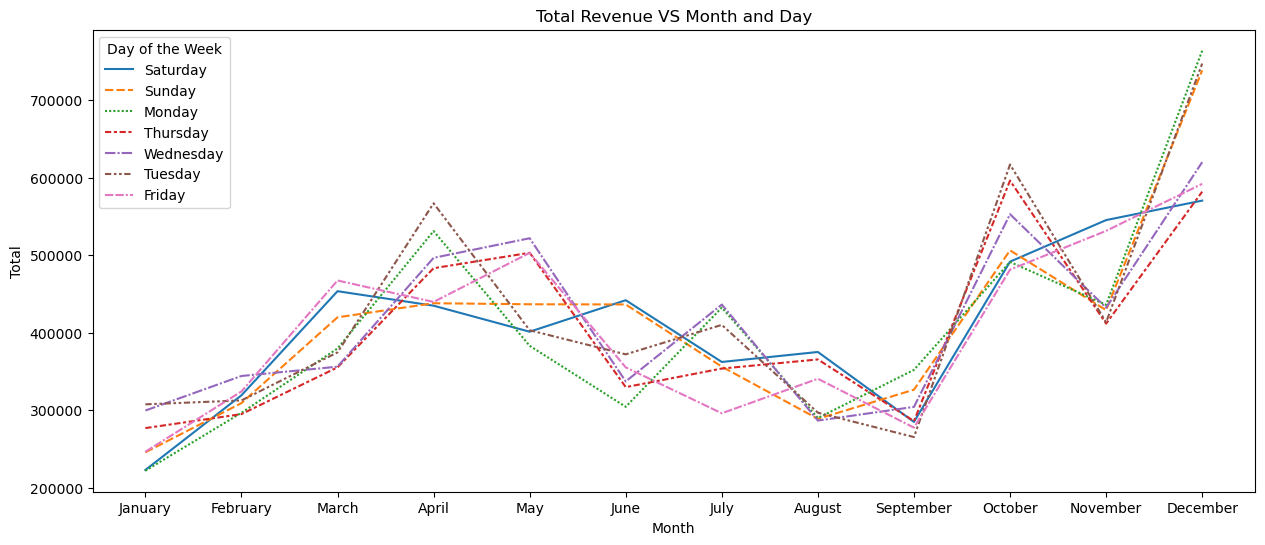

In [128]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=day_data_Total)
plt.title('Total Revenue VS Month and Day')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend(title='Day of the Week', loc='upper left')
plt.show()

#### Analyzing sales to understand peak sale hours

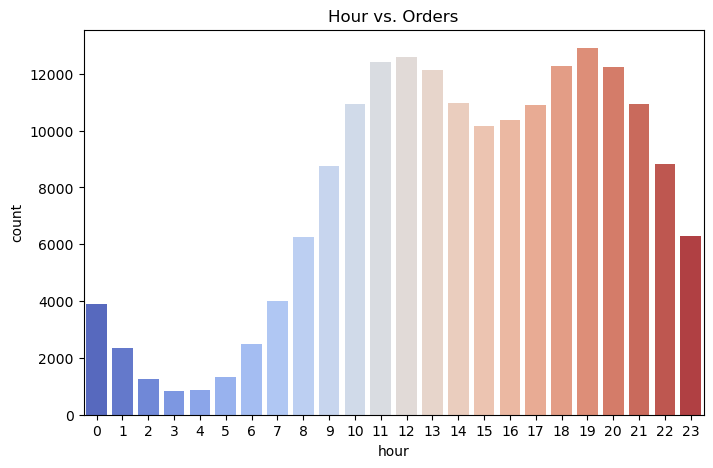

In [141]:
plt.figure(figsize=(8, 5))
plt.title('Hour vs. Orders')
unique_hours = data['hour'].nunique()
palette = sns.color_palette("coolwarm", n_colors=unique_hours)
sns.countplot(x='hour', data=data, palette=palette)
plt.show()

#### Identifying which products sold the most

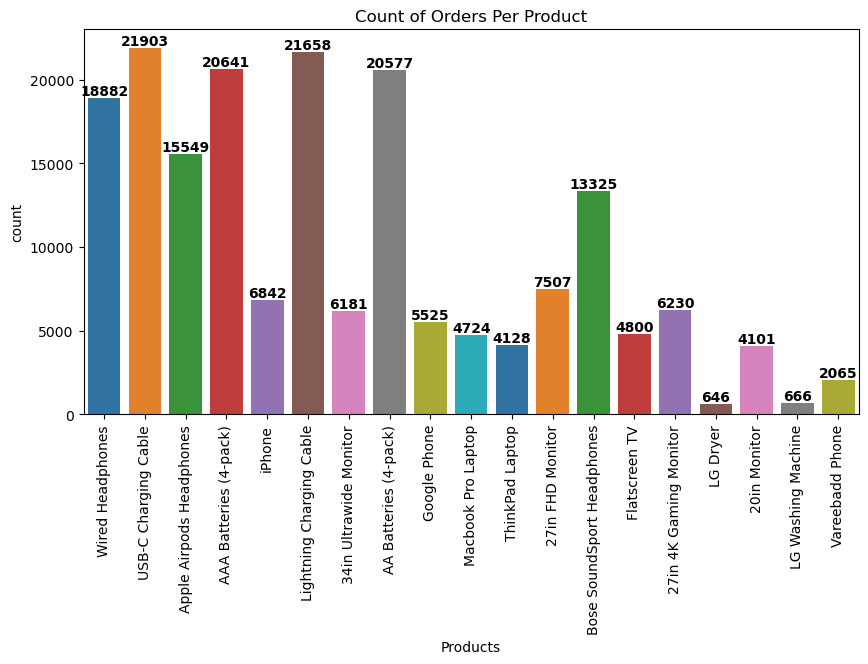

In [147]:
plt.figure(figsize=(10, 5))
unique_products = data['Product'].nunique()
palette = sns.color_palette("tab10", n_colors=unique_products)
ax = sns.countplot(x='Product', data=data, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Products')
plt.title('Count of Orders Per Product')
plt.show()

#### Identifying top Products sold in each city

In [148]:
products_by_city = data.groupby(['City' , 'Product'] , as_index=False).agg({'Quantity Ordered' : 'sum' ,'Total':'sum'})
products_by_city.rename(columns = {'Quantity Ordered':'orders_count'},inplace = True)

In [149]:
def get_top_products(group):
    return group.nlargest(5, 'orders_count')
products_by_city = products_by_city.groupby(['City'] , group_keys = False).apply(get_top_products)

In [150]:
x = products_by_city.pivot_table(index = 'City' , values ='orders_count',columns = 'Product' )

<Figure size 1200x700 with 0 Axes>

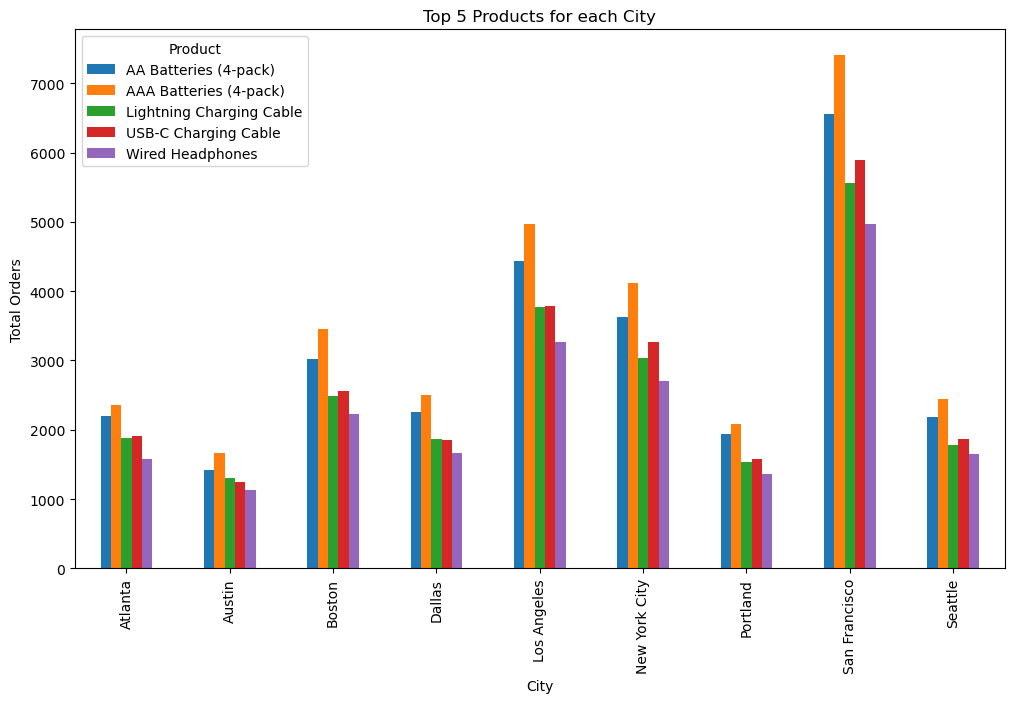

In [152]:
plt.figure(figsize=(12, 7))
palette = sns.color_palette("tab10", n_colors=len(x))
x.plot(kind='bar', figsize=(12, 7), color=palette)
plt.ylabel('Total Orders')
plt.title("Top 5 Products for each City")
plt.show()

#### Identifying the top 5 Products earning highest revenue for each city

In [153]:
def get_top_products(group):
    return group.nlargest(5, 'Total')
products_by_city = products_by_city.groupby(['City'] , group_keys = False).apply(get_top_products)

<Figure size 1200x700 with 0 Axes>

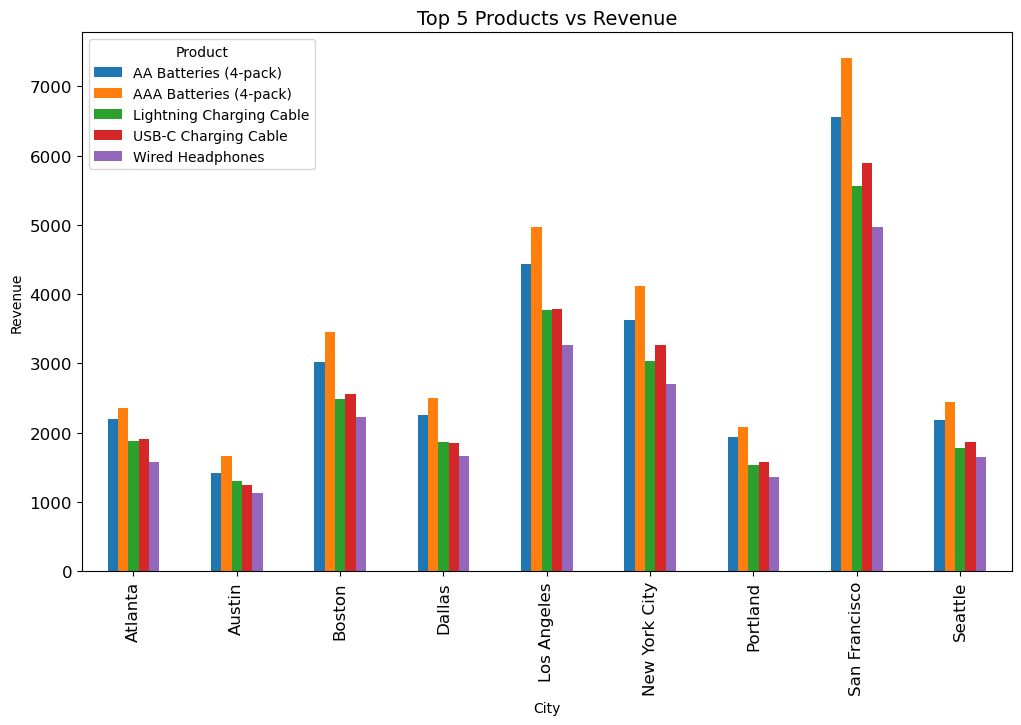

In [155]:
plt.figure(figsize=(12, 7))
palette = sns.color_palette("tab10", n_colors=len(x))
x.plot(kind='bar', figsize=(12, 7), fontsize=12, color=palette)

plt.ylabel('Revenue')
plt.title("Top 5 Products vs Revenue", fontsize=14)
plt.show()

#### Determining orders with multiple products - more than one item

In [157]:
Products = data.groupby('Order ID')['Product'].count()
Products = Products.value_counts()
Products = Products.nlargest(3)

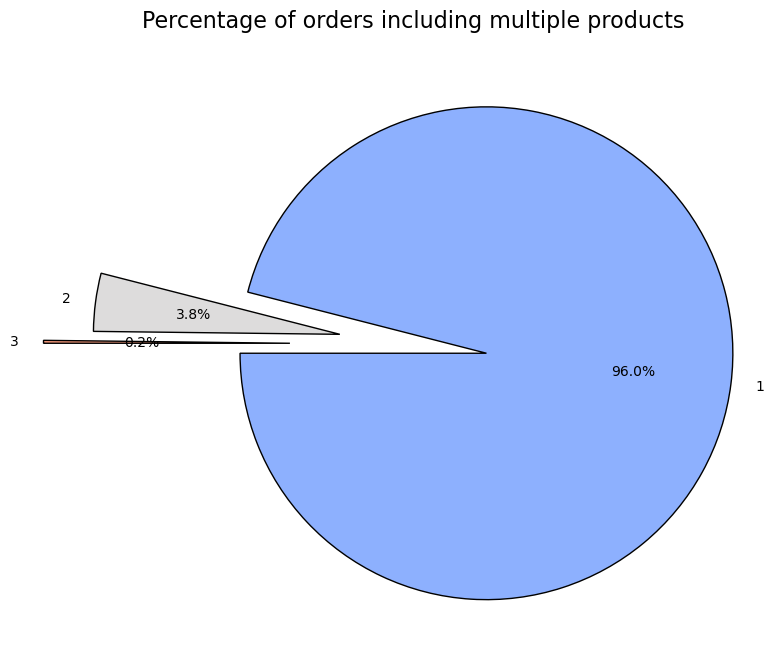

In [162]:
percentage_values = Products / Products.sum() * 100
palette = sns.color_palette("coolwarm", len(percentage_values))
explode = [0.3, 0.3, 0.5]
plt.figure(figsize=(8, 8))
plt.pie(percentage_values, labels=percentage_values.index, colors=palette, autopct='%1.1f%%', startangle=180, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title("Percentage of orders including multiple products", fontsize=16)
plt.show()

#### Identifying highest single-order value

In [163]:
data[data['Total'] == max(data['Total'])]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total,day,month,hour,Street Address,City,State,Zip
5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,3400.0,Monday,April,12,731 11th St,New York City,NY,10001
4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,3400.0,Saturday,April,21,668 Park St,San Francisco,CA,94016
6776,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,3400.0,Monday,May,13,643 4th St,Boston,MA,02215
385,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,3400.0,Saturday,June,9,953 Ridge St,San Francisco,CA,94016


#### Identifying cities with highest revenue

In [164]:
orders_by_city = data.groupby(['City'] , as_index=False).agg({'Order ID' : 'count' ,'Total':'sum'})
orders_by_city.rename(columns = {'Order ID':'orders_count'},inplace = True)

In [165]:
orders_by_city

,City,orders_count,Total
0,Atlanta,14881,2795498.58
1,Austin,9905,1819581.75
2,Boston,19934,3661642.01
3,Dallas,14820,2767975.40
4,Los Angeles,29605,5452570.80
5,New York City,24876,4664317.43
6,Portland,12465,2320490.61
7,San Francisco,44732,8262203.91
8,Seattle,14732,2747755.48


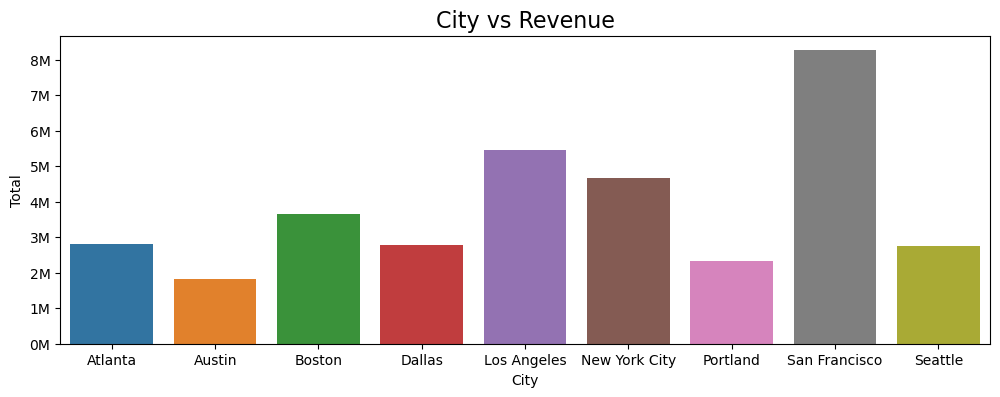

In [167]:
plt.figure(figsize=(12 , 4))
ax = sns.barplot(data=orders_by_city, x='City', y='Total', palette='tab10')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M'))
plt.title("City vs Revenue", fontsize=16)
plt.show()

#### Identifying which city sold the most products

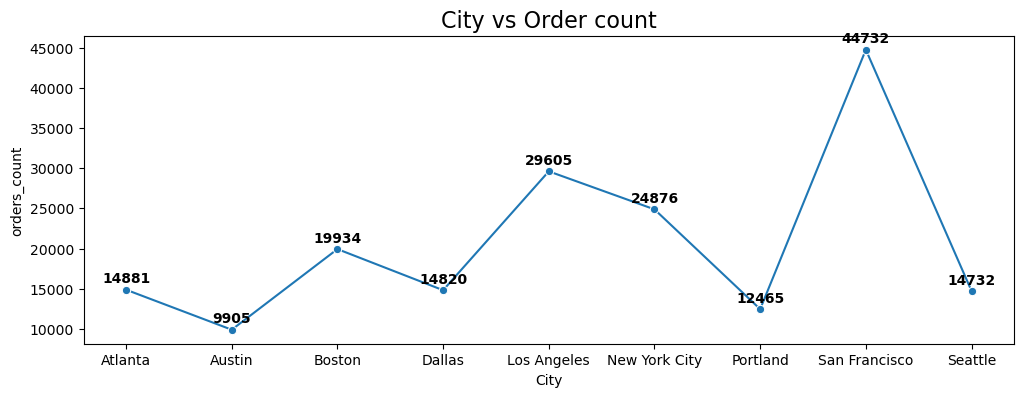

In [171]:
plt.figure(figsize=(12, 4))
ax = sns.lineplot(data=orders_by_city, x='City', y='orders_count', palette='coolwarm', marker='o')
for i, row in orders_by_city.iterrows():
    ax.annotate(f'{row["orders_count"]}', 
                (row['City'], row['orders_count']), 
                textcoords="offset points", 
                xytext=(0, 5),  # Slightly above the point
                ha='center', fontsize=10, color='black', fontweight='bold')

plt.title("City vs Order count", fontsize=16)
plt.show()

#### Identifying which products are often sold together

In [173]:
orders_dict = collections.defaultdict(int)

In [174]:
ndata = data.copy()
ndata.reset_index(inplace = True)

In [175]:
order = ndata.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

In [176]:
x = order.str.split(',')

In [177]:
def combination(orders , length):
  lst = []
  def resc(indx ,path):
    if len(path) == 2:
      lst.append(path)
      return
    if indx == length:
      return

    resc(indx+1 , [orders[indx]]+path)
    resc(indx+1 , path)

  resc(0 , [])
  return lst

In [178]:
for product in x:
  length =  len(product)
  if length == 2:
    orders_dict[tuple(sorted(product))]+=1
  elif length > 2:
    res = combination(product , length)
    for pair1 , pair2 in res:
      orders_dict[tuple(sorted([pair1 , pair2]))]+=1

In [179]:
most_common_items = sorted(orders_dict.items() , key = lambda x : x[1] , reverse = True)[:10]
for Orders,count in most_common_items:
  print(Orders,count)

('Lightning Charging Cable', 'iPhone') 2161
('Google Phone', 'USB-C Charging Cable') 2140
('Wired Headphones', 'iPhone') 1020
('Google Phone', 'Wired Headphones') 970
('Apple Airpods Headphones', 'iPhone') 825
('USB-C Charging Cable', 'Vareebadd Phone') 788
('USB-C Charging Cable', 'Wired Headphones') 547
('Bose SoundSport Headphones', 'Google Phone') 519
('Vareebadd Phone', 'Wired Headphones') 339
('Lightning Charging Cable', 'Wired Headphones') 328


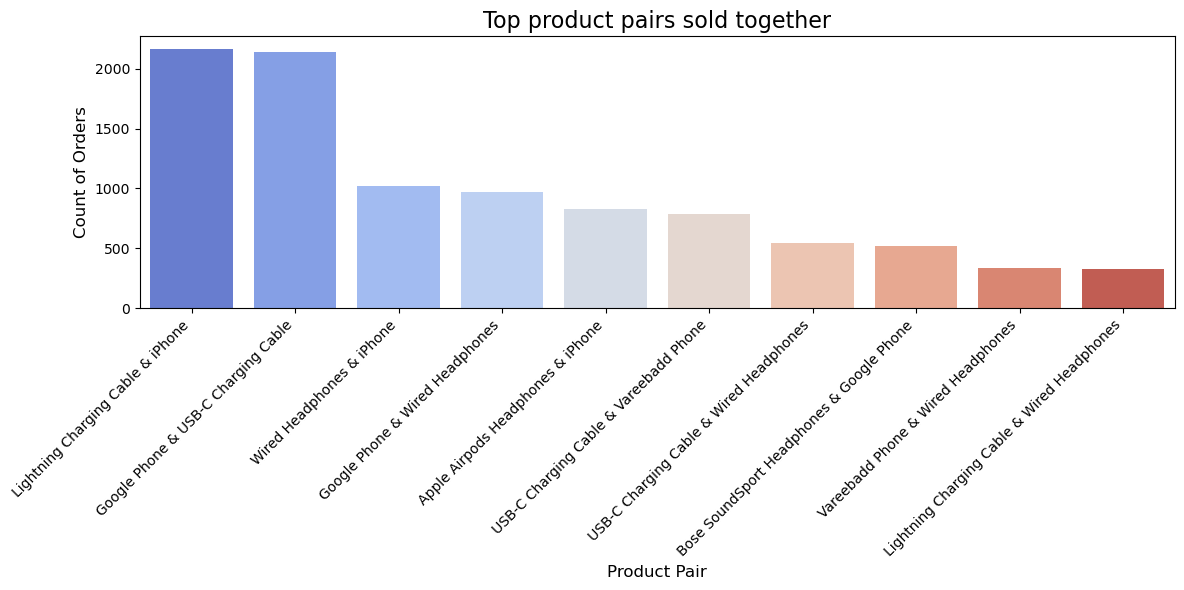

In [180]:
product_data = {
    'Product Pair': [f'{item[0][0]} & {item[0][1]}' for item in most_common_items],
    'Count': [item[1] for item in most_common_items]
}
df = pd.DataFrame(product_data)
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Pair', y='Count', data=df, palette='coolwarm')
plt.xticks(rotation=45, ha='right')

plt.title('Top product pairs sold together', fontsize=16)
plt.xlabel('Product Pair', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.tight_layout()
plt.show()

#### Checking distribution of orders by states

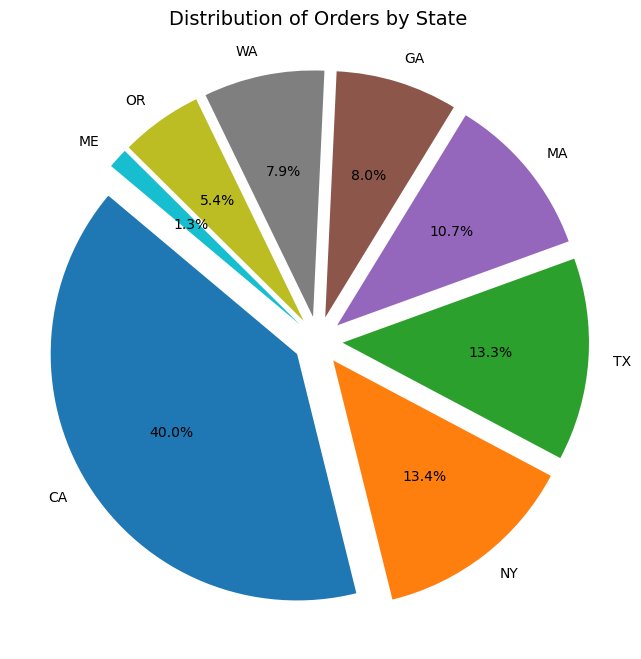

In [181]:
states = data['State'].value_counts()
cmap = plt.get_cmap("tab10")
colors = [cmap(i) for i in np.linspace(0, 1, len(states))]

explode = [0.1] * len(states) 

plt.figure(figsize=(8, 8))
plt.pie(states, labels=states.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Distribution of Orders by State", fontsize=14)
plt.show()